# Exploratory Data Analysis (EDA)

## Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Loading

Let's load the dataset from the CSV file and take a look at the first few rows.

Let's check the structure and data types of the DataFrame.

In [2]:
orders = pd.read_csv('data/orders.csv')
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


In [3]:
na_counts = orders.isna().sum()
print(na_counts)

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214874 entries, 0 to 3214873
Data columns (total 6 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
dtypes: float64(1), int64(5)
memory usage: 147.2 MB


## Univariate Analysis

### Order ID

The column 'order_id' is probably a unique identifier for each order. Let's check for uniqueness.

In [5]:
assert len(orders.order_id) == len(orders.order_id.unique()), "Order IDs are not unique!"

- As we expected, `order_id` is a unique identifier for each order.
- `order_id` is a categorical variable that is nominal in nature.
  - Categorical variable because it is used to label or identify them. It is not used for mathematical operations.
  - Nominal because the value do not represent any kind of order or ranking. However, it might increase with time.
- If there was a field called `order_date` or `order_timestamp`, it would have been quantitative variable.
  - In such cases, we can measure intervals / ratio as they are actual sequences.

### User ID

The column 'user_id' represents the user who placed the order. It is categorical variable that is nominal in nature.

Let's check the number of unique users.

In [6]:
num_unique_users = orders.user_id.nunique()
num_unique_users

206209

So there are 206209 unique users in the dataset.

### Order Number

- `order_number` is a quantitative variable that is used to sequence the orders placed by a user.
- It is ordinal in nature because it represents a clear ordering of the orders placed by a user.
- The minimum value is 1, indicating the first order placed by a user.
- The maximum value is 99, indicating that some users have placed up to 99 orders.

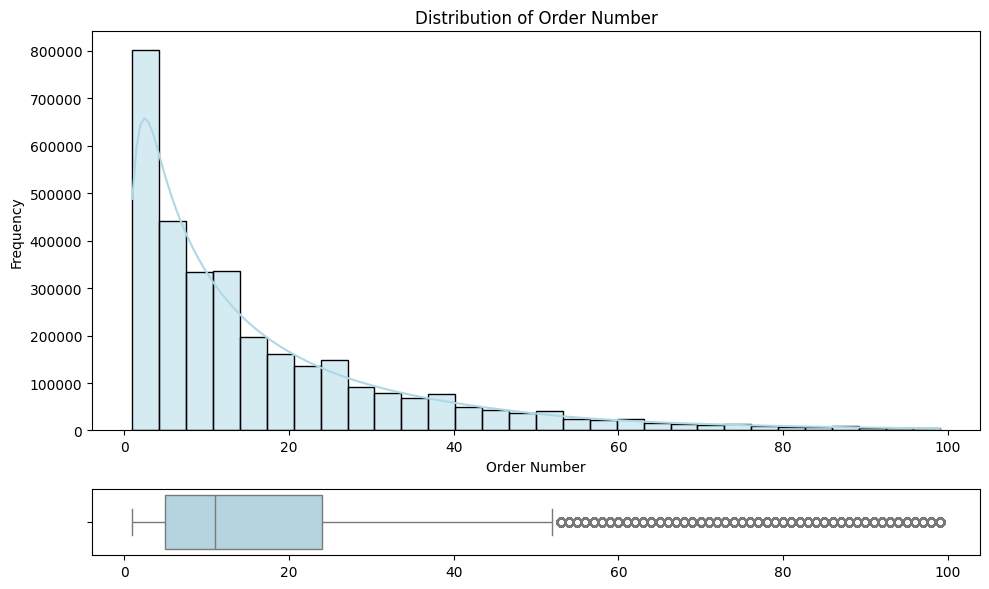

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 0.5]})

# Distribution Plot (top)
sns.histplot(orders['order_number'], bins=30, kde=True, color='lightblue', ax=axes[0])
axes[0].set_title('Distribution of Order Number')
axes[0].set_xlabel('Order Number')
axes[0].set_ylabel('Frequency')

# Box Plot (bottom)
sns.boxplot(x=orders['order_number'], color='lightblue', ax=axes[1])
axes[1].set_xlabel('')
plt.tight_layout()
plt.show()

In [8]:
orders.order_number.quantile([0.25, 0.5, 0.75])

0.25     5.0
0.50    11.0
0.75    24.0
Name: order_number, dtype: float64

### Order Day of Week

- Order of week is a categorical variable that is ordinal in nature.
- Though they have meaningful order (0 to 6), and consistent intervals, the scale is cyclic (after 6 comes 0 again).

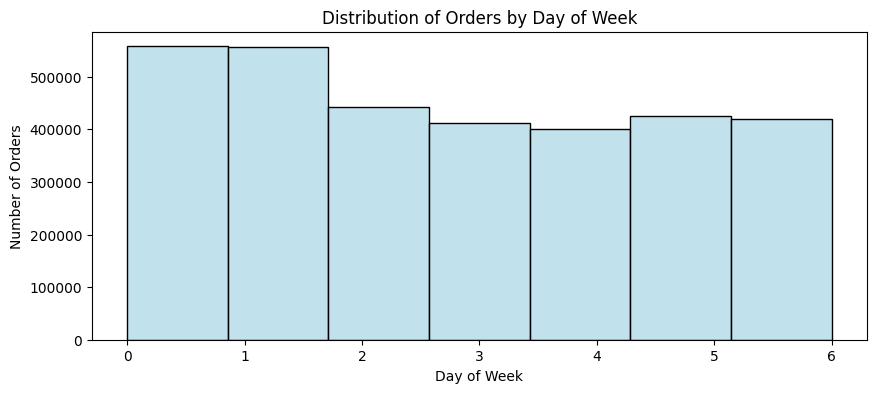

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(orders['order_dow'], bins=7, kde=False, color='lightblue', ax=ax)
ax.set_title('Distribution of Orders by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Orders')
plt.show()

In [10]:
orders.order_dow.value_counts().sort_index()

order_dow
0    557772
1    556705
2    441955
3    412400
4    401212
5    425982
6    418848
Name: count, dtype: int64

### Order Hour of Day

- `order_hour_of_day` is a quantitative (discrete) variable that is used to represent the hour of the day when the order was placed.
- It is interval in nature because the intervals between the hours are consistent and meaningful.
- It has a cyclic nature (after 23 comes 0 again). However, the day changes after 23, so it is not purely cyclic when we have `order_dow` in consideration.
- The minimum value is 0, indicating midnight, and the maximum value is 23, indicating 11 PM.

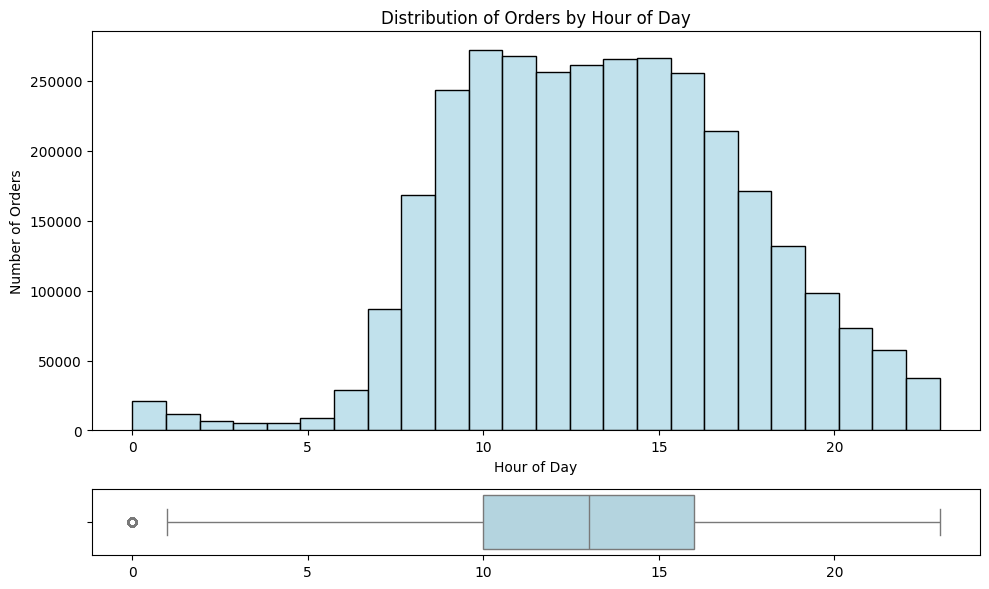

In [11]:
# Distribution Plot of order_hour_of_day with box plot in bottom
fig, axes = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 0.5]})
# Distribution Plot (top)
sns.histplot(orders['order_hour_of_day'], bins=24, color='lightblue', ax=axes[0])
axes[0].set_title('Distribution of Orders by Hour of Day')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Orders')
# Box Plot (bottom)
sns.boxplot(x=orders['order_hour_of_day'], color='lightblue', ax=axes[1])
axes[1].set_xlabel('')
plt.tight_layout()
plt.show()

In [12]:
orders.order_hour_of_day.quantile([0.25, 0.5, 0.75])

0.25    10.0
0.50    13.0
0.75    16.0
Name: order_hour_of_day, dtype: float64

### Order Days Since Prior Order

- `days_since_prior_order` is a discrete quantitative variable that represents the number of days since the user's last order.
- The interval between the values is consistent and meaningful, and there is a true zero point (0 days since prior order).
- We can define meaningful ratios (e.g., 4 days is twice as long as 2 days).

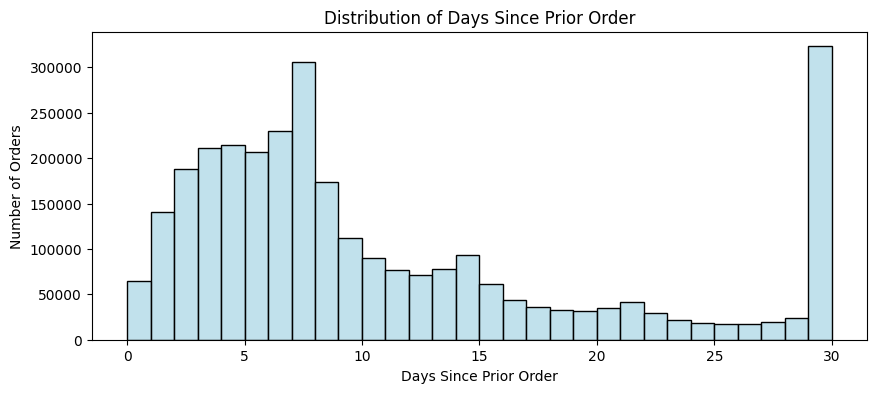

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(orders['days_since_prior_order'].dropna(), bins=30, kde=False, color='lightblue', ax=ax)
ax.set_title('Distribution of Days Since Prior Order')
ax.set_xlabel('Days Since Prior Order')
ax.set_ylabel('Number of Orders')
plt.show()

In [14]:
orders.days_since_prior_order.describe()

count    3.008665e+06
mean     1.070724e+01
std      8.954180e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

- The number of orders for which days since prior order is 30 is significantly higher than other values.
- Few possibilities : a) significant number of user place once every 30 days, or b) the maximum limit for days_since_prior_order is capped at 30, and any value above 30 is recorded as 30.
- We have also observed that there are 206209 NaN values.
- If the value of days since prior order is capped at 30, what does NAN stand for ? User who deleted after first order ?
- Therefore, we should be cautious while using this feature in modeling.

## Multivariate Analysis

### Orders per User

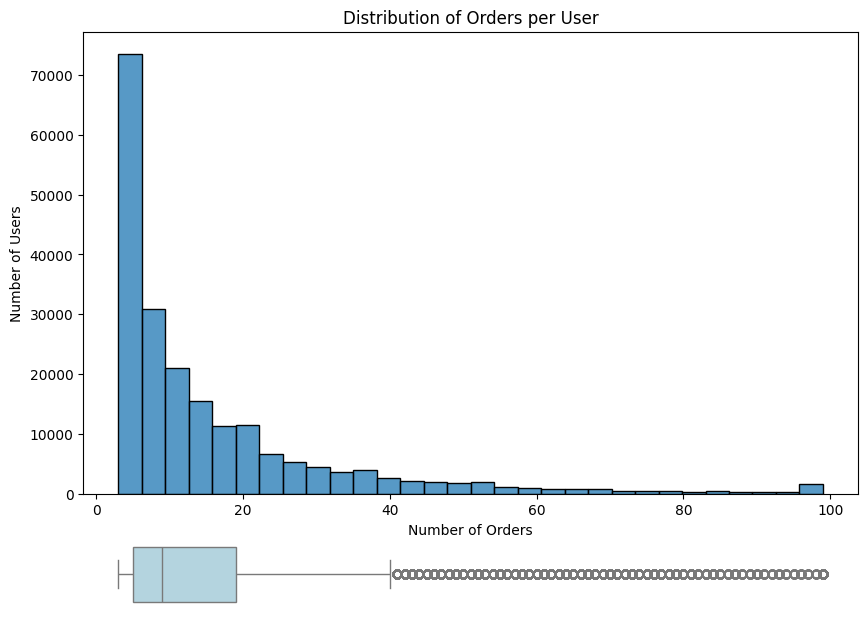

In [15]:
order_counts = orders['user_id'].value_counts()

# Histogram
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(order_counts, bins=30, kde=False, ax=ax)
ax.set_title('Distribution of Orders per User')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Number of Users')

# Boxplot for x-axis (below the histogram)
ax_xbox = ax.inset_axes([0, -0.25, 1, 0.15], sharex=ax)
sns.boxplot(x=order_counts, ax=ax_xbox, orient='h', color='lightblue')
ax_xbox.axis('off')

plt.show()

In [16]:
order_counts.quantile([0.25, 0.5, 0.75])

0.25     5.0
0.50     9.0
0.75    19.0
Name: count, dtype: float64

### Orders by Day of Week and Hour of Day

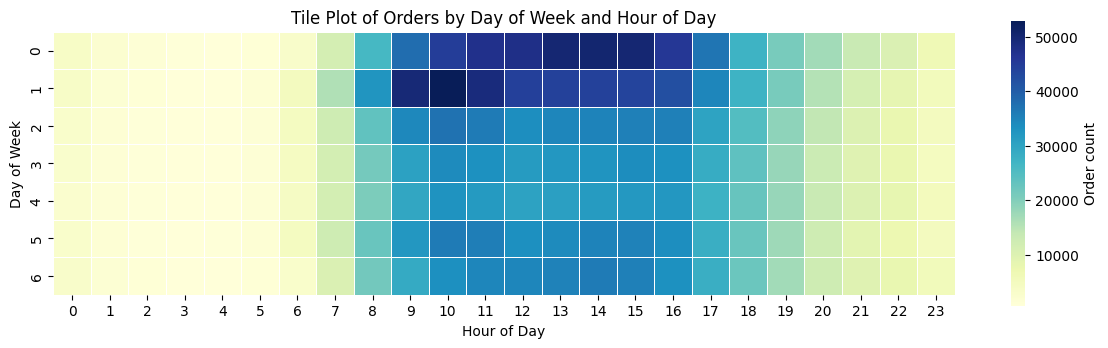

In [17]:
pivot_table = orders.pivot_table(
    index='order_dow',
    columns='order_hour_of_day',
    values='order_id',
    aggfunc='count',
    fill_value=0
)
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table,
    cmap='YlGnBu',
    annot=False,
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.5, 'label': 'Order count'},
    xticklabels=True,
    yticklabels=True
)

plt.title('Tile Plot of Orders by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

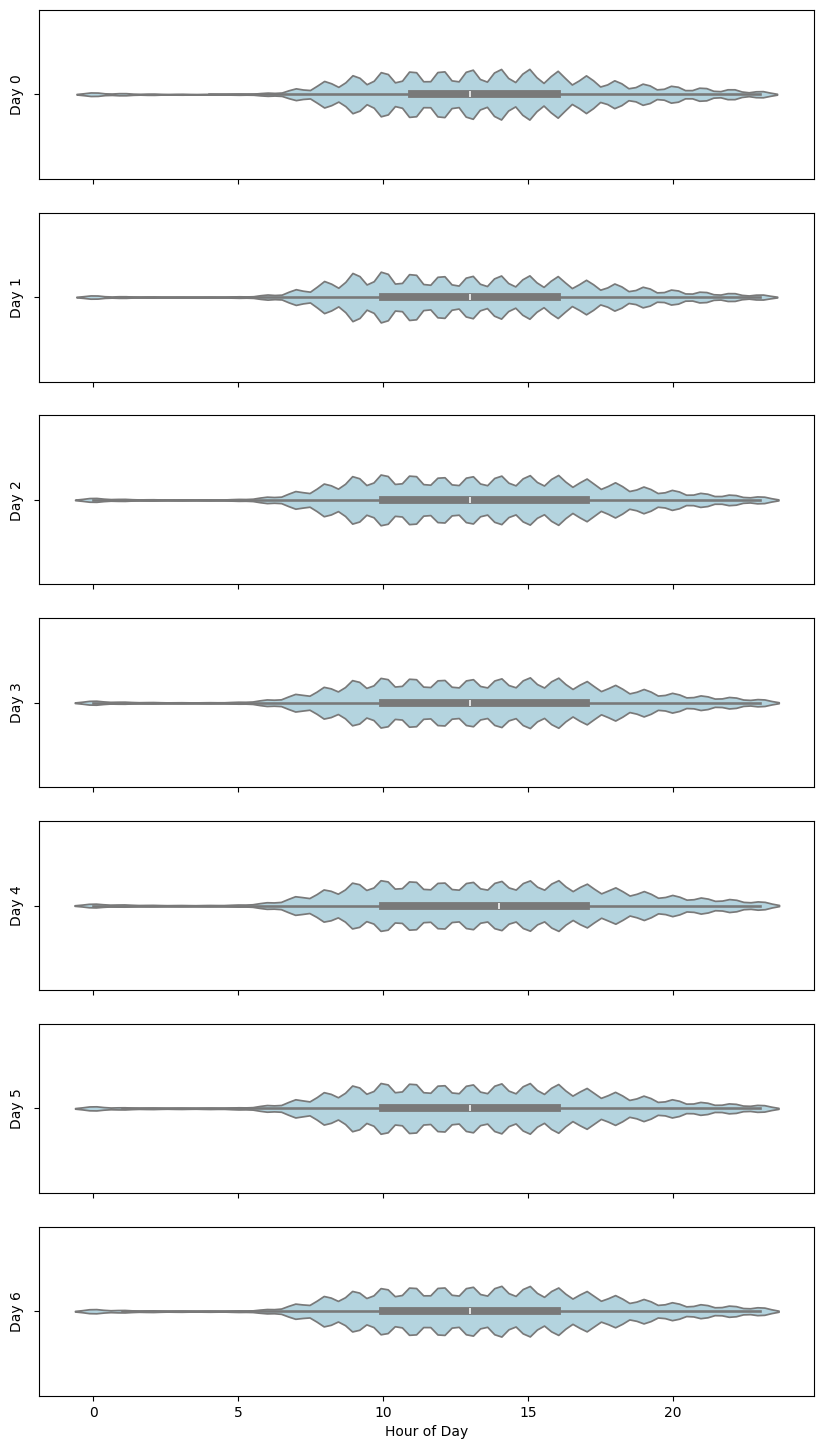

In [18]:
fig, axes = plt.subplots(7, 1, figsize=(10, 18), sharex=True)

for dow in range(7):
    ax = axes[dow]
    sns.violinplot(
        x='order_hour_of_day',
        y=None,
        data=orders[orders['order_dow'] == dow],
        ax=ax,
        orient='h',
        color='lightblue',
        width=0.3,
    )
    ax.set_ylabel(f'Day {dow}')
    if dow < 6:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Hour of Day')

- We can we that most of the orders are place between 8 AM and 7 PM irrespective of day of week.
- There is slight change in median, and spread of order hours across different days of week.
- However, the overall pattern is quite similar across all days of the week.